In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [37]:
# Load data
data = sns.load_dataset('titanic')

# Handle missing values (your approach here)

# Encode categorical features (e.g., for Pclass)
le = LabelEncoder()
data['pclass'] = le.fit_transform(data['pclass'])
data['sex'] = le.fit_transform(data['sex'])
data['class'] = le.fit_transform(data['class'])
data['alive'] = le.fit_transform(data['alive'])
data['alone'] = le.fit_transform(data['alone'])
data['age'].fillna(data['age'].mean(), inplace=True)    



C:\Users\AI\AppData\Local\Temp\ipykernel_4768\3958101048.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [38]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,2,1,22.0,1,0,7.2500,S,2,man,True,NaN,Southampton,0,0
1,1,0,0,38.0,1,0,71.2833,C,0,woman,False,C,Cherbourg,1,0
2,1,2,0,26.0,0,0,7.9250,S,2,woman,False,NaN,Southampton,1,1
3,1,0,0,35.0,1,0,53.1000,S,0,woman,False,C,Southampton,1,0
4,0,2,1,35.0,0,0,8.0500,S,2,man,True,NaN,Southampton,0,1


In [50]:
# Define features and target variable
X = data[['age','pclass','sex','class','alive','alone']]  # Replace ... with other features
y = data['fare']

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1071.367246666397


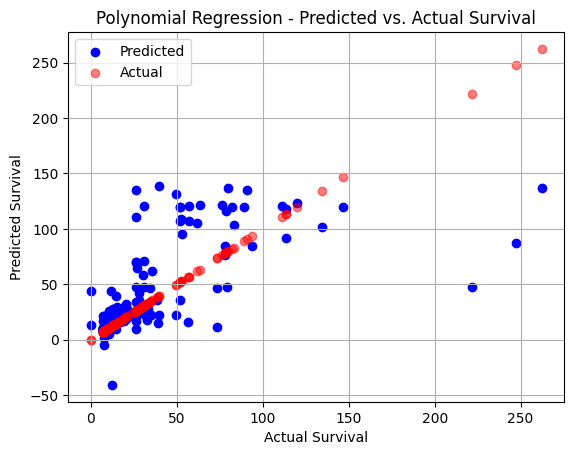

In [51]:
import matplotlib.pyplot as plt

# Predicted vs. Actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Survival')
plt.ylabel('Predicted Survival')
plt.title('Polynomial Regression - Predicted vs. Actual Survival')
plt.legend()
plt.grid(True)
plt.show()
